# Import Necessary Libraries

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

# EDA

## Read The Data

In [2]:
df =pd.read_csv('/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


there is no null data. We have 1 bool feature, 9 float, 5 int, 3 object

In [4]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


let's study and visualize each feature individually

## Artist Feature

In [5]:
top10_artists= df['artist'].value_counts()[:10].sort_values(ascending = False)

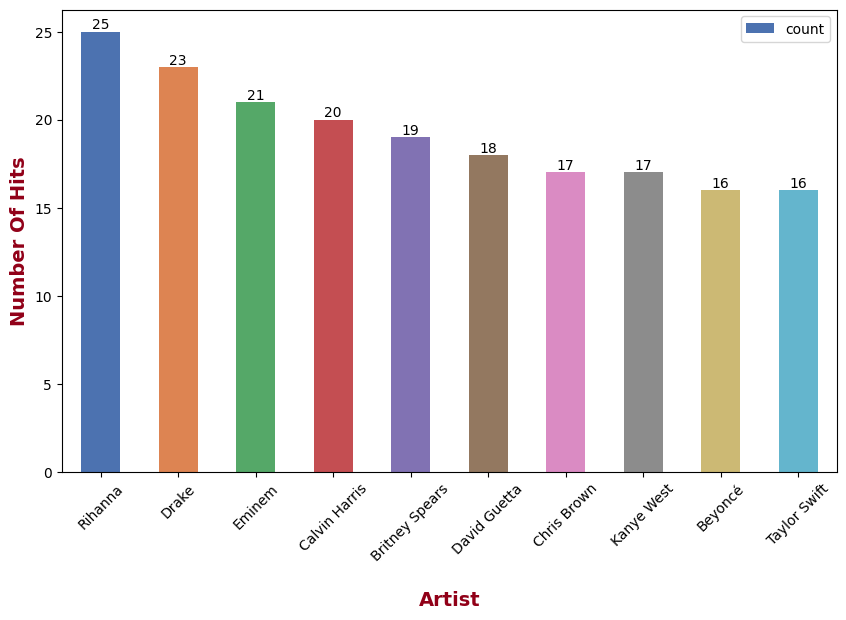

In [6]:
plt.figure(figsize=(10,6))
top10_artists.plot(kind='bar', color = sn.color_palette('deep'))
plt.xlabel('\nArtist',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Number Of Hits',weight = 'bold', color = '#910018', fontsize = 14)

for i, value in enumerate(top10_artists):
    plt.text(i, value + .15, str(value), ha='center', color='black', fontsize=10)

plt.xticks(rotation = 45)
plt.legend()
plt.show()

Rihanna has the biggest number of hits with 25 hits

## Song Feature

### Songs with popularity more than 84

In [7]:
filtered_songs= df[df['popularity']>84]
sorted_songs = filtered_songs.sort_values(by='popularity', ascending=False)['song']
sorted_songs

1322         Sweater Weather
1311            Another Love
201               Without Me
6        The Real Slim Shady
1613          Wait a Minute!
1819    lovely (with Khalid)
1929    lovely (with Khalid)
209         'Till I Collapse
1227    Locked out of Heaven
1304    Locked out of Heaven
1512            Daddy Issues
1514              The Nights
1709                 Perfect
1999                 Circles
Name: song, dtype: object

### top 10 songs in popularity

In [8]:
top_10_songs=df.nlargest(10, 'popularity')['song']
top_10_songs

1322         Sweater Weather
1311            Another Love
201               Without Me
6        The Real Slim Shady
1613          Wait a Minute!
1819    lovely (with Khalid)
1929    lovely (with Khalid)
209         'Till I Collapse
1227    Locked out of Heaven
1304    Locked out of Heaven
Name: song, dtype: object

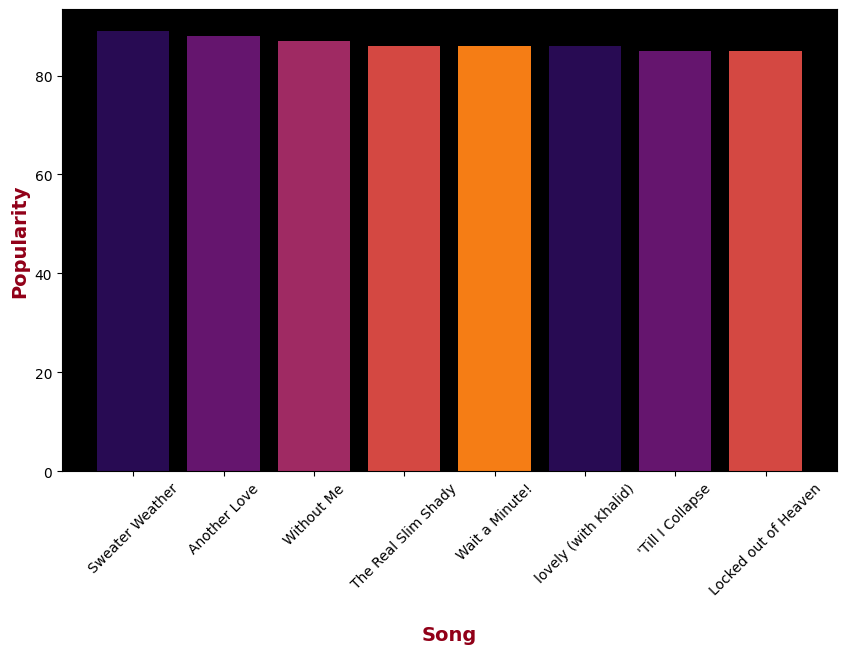

In [9]:
top_10_df = df.nlargest(10, 'popularity')

plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['grid.color'] = 'dimgray'
plt.figure(figsize=(10,6))

plt.bar("song", "popularity", data = top_10_df, color = sn.color_palette('inferno'))
#sn.barplot(x='song', y='popularity', data=top_10_df, color =sn.color_palette('inferno'))

plt.xlabel('\nSong',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Popularity',weight = 'bold', color = '#910018', fontsize = 14)

plt.xticks(rotation = 45)

plt.show()

Sweater Weather is the most popular hit from 2000 to 2019

## Duration_MS Feature

In [10]:
duration_minutes= df['duration_ms']/60000
duration_minutes

0       3.519333
1       2.784433
2       4.175767
3       3.741550
4       3.342667
          ...   
1995    3.017100
1996    2.973767
1997    3.343217
1998    2.850483
1999    3.588000
Name: duration_ms, Length: 2000, dtype: float64

## Songs Duration Distribution with Density Curve 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



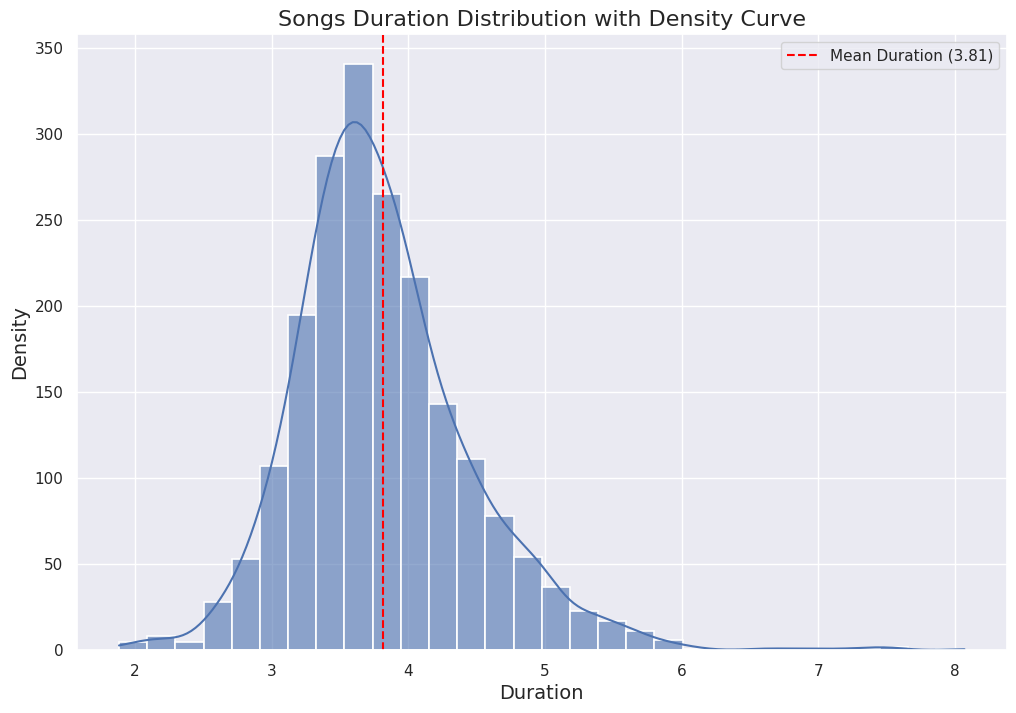

In [11]:
sn.set_theme()
plt.figure(figsize=(12,8))

sn.histplot(duration_minutes, bins= 30, kde= True, edgecolor= 'white', linewidth= 1.2, alpha =0.6)

plt.title('Songs Duration Distribution with Density Curve', fontsize=16)
plt.xlabel('Duration', fontsize=14)
plt.ylabel('Density', fontsize=14)

mean_duration = duration_minutes.mean()
plt.axvline(x=mean_duration, color='red', linestyle='--', label=f'Mean Duration ({mean_duration:.2f})')

plt.legend()
plt.show()

the mean duration of the hits on spotify is 3.81

In [12]:
longest_songs_df= df.nlargest(3,'duration_ms')

In [13]:
shortest_songs_df= df.nsmallest(3,'duration_ms')

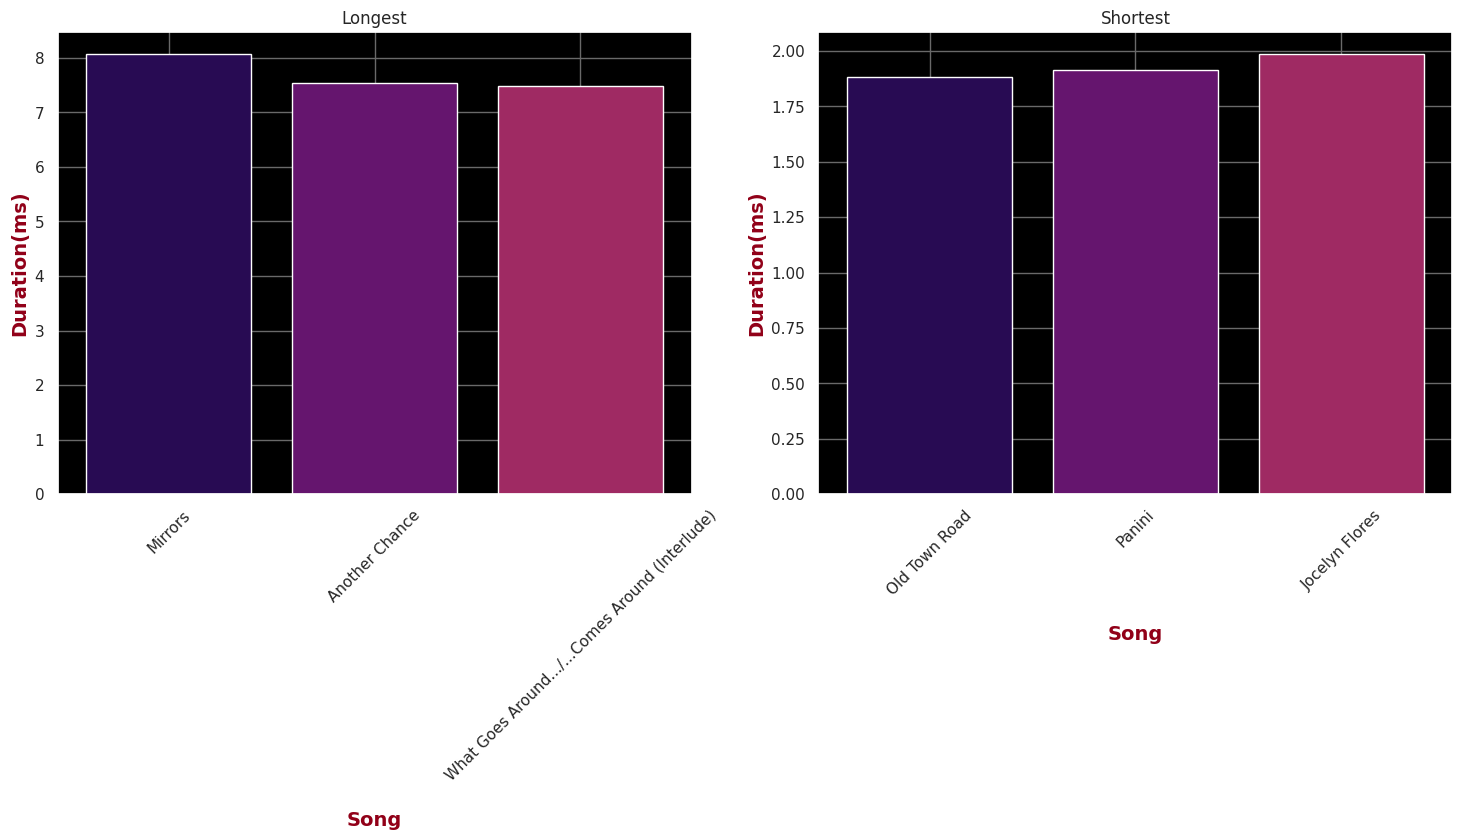

In [14]:
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['grid.color'] = 'dimgray'
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.bar(longest_songs_df.song,longest_songs_df.duration_ms/60000, color = sn.color_palette('inferno'))
plt.xlabel('\nSong',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Duration(ms)',weight = 'bold', color = '#910018', fontsize = 14)
plt.title('Longest')
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
plt.bar(shortest_songs_df.song,shortest_songs_df.duration_ms/60000, color = sn.color_palette('inferno'))
plt.xlabel('\nSong',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Duration(ms)',weight = 'bold', color = '#910018', fontsize = 14)
plt.title('Shortest')
plt.xticks(rotation = 45)

plt.show()

## Year Feature

In [15]:
top_6_years= df.year.value_counts()[:6]

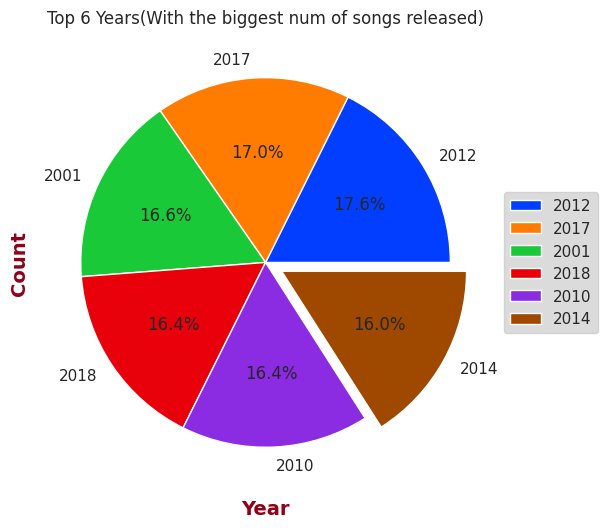

In [16]:
plt.figure(figsize=(18,6))
explode = (0,0,0,0,0,0.1)

top_6_years.plot(kind='pie',explode = explode, autopct= '%.1f%%', colors= sn.color_palette('bright'))
plt.title("Top 6 Years(With the biggest num of songs released)")
plt.xlabel('Year',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Count',weight = 'bold', color = '#910018', fontsize = 14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, facecolor='lightgray')
plt.show()

2012 was the year with the most num of hits with 17.6% compared to the top 6 years

## Explict Feature

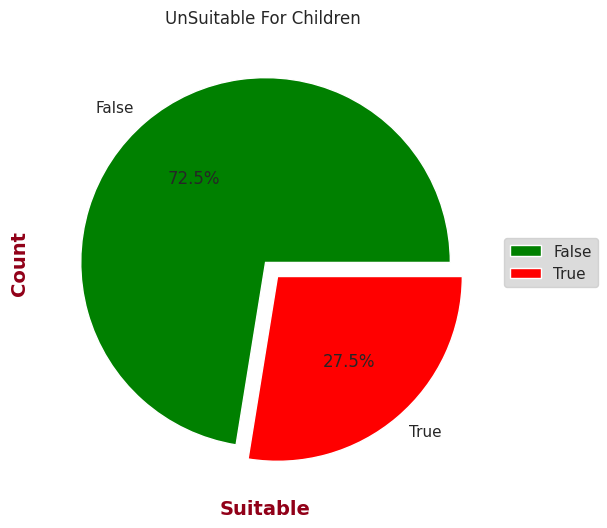

In [17]:
suitable_for_children = df.explicit.value_counts()
plt.figure(figsize=(18,6))
explode = (0,0.1)

suitable_for_children.plot(kind='pie',explode = explode, autopct= '%.1f%%', colors= ['green','red'])
plt.title("UnSuitable For Children ")
plt.xlabel('Suitable',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Count',weight = 'bold', color = '#910018', fontsize = 14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, facecolor='lightgray')
plt.show()

only 27.5% of the songs are unsuitable for children

## The Most Famous Genre & Genres Distribution

In [18]:

fig = px.histogram(df,
                   x='genre',
                   title='Distribution of Genres in Songs',
                   color_discrete_sequence=['red'],
                   template='plotly_dark',
                   labels={'genre': 'Genre', 'count': 'Number of Songs'},
                   category_orders={'genre': df['genre'].value_counts().index[::-1]})

fig.show()


### All Taylor Swift hits  

In [19]:
df[df['artist']=='Taylor Swift']

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
905,Taylor Swift,Love Story,236266,False,2008,74,0.617,0.741,2,-3.970,1,0.0311,0.13100,0.000000,0.0772,0.306,118.984,pop
993,Taylor Swift,You Belong With Me,231146,False,2008,55,0.687,0.771,6,-4.424,1,0.0384,0.16400,0.000025,0.1120,0.445,129.964,pop
1093,Taylor Swift,Back To December,293026,False,2010,65,0.529,0.670,2,-4.663,1,0.0303,0.11700,0.000000,0.3340,0.286,141.893,pop
1258,Taylor Swift,I Knew You Were Trouble.,219720,False,2012,59,0.622,0.469,3,-6.798,0,0.0363,0.00454,0.000002,0.0335,0.679,77.019,pop
1343,Taylor Swift,I Knew You Were Trouble.,219720,False,2012,76,0.622,0.469,3,-6.798,0,0.0363,0.00454,0.000002,0.0335,0.679,77.019,pop
1393,Taylor Swift,22,232120,False,2012,68,0.661,0.729,7,-6.561,1,0.0376,0.00215,0.001300,0.0477,0.668,103.987,pop
1421,Taylor Swift,Bad Blood,211933,False,2014,54,0.646,0.794,7,-6.104,1,0.1900,0.08850,0.000006,0.2010,0.287,170.216,pop
1462,Taylor Swift,Style,231000,False,2014,61,0.588,0.791,7,-5.595,1,0.0402,0.00245,0.002580,0.1180,0.487,94.933,pop
1473,Taylor Swift,Shake It Off,219200,False,2014,79,0.647,0.800,7,-5.384,1,0.1650,0.06470,0.000000,0.3340,0.942,160.078,pop
1510,Taylor Swift,Blank Space,231826,False,2014,82,0.760,0.703,5,-5.412,1,0.0540,0.10300,0.000000,0.0913,0.570,95.997,pop


## Distribution Of The Rest Of The Features

In [20]:
histogram_labels = ['popularity',
                    'danceability', 
                    'energy', 
                    'speechiness', 
                    'loudness', 
                    'acousticness', 
                    'liveness', 
                    'instrumentalness',
                    'valence',
                    'tempo'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)